In [1]:
import numpy as np
import os
import os.path as osp
import pandas as pd

In [2]:
def load_muscle_activations_meta(
    csv_path,
):
    all_segments = pd.read_csv(csv_path)

    all_segments = all_segments.astype(str)  # Change all other columns to str
    all_segments[["height_cm", "weight_kg", "babel_sid"]] = all_segments[
        ["height_cm", "weight_kg", "babel_sid"]
    ].astype(float)
    all_segments["babel_sid"] = all_segments["babel_sid"].fillna(-1)
    all_segments[["babel_sid"]] = all_segments[["babel_sid"]].astype(int)

    return all_segments


muscle_activations = load_muscle_activations_meta(
    csv_path=os.path.expandvars("$LSDF/data/activity/MuscleSim/musclesim_dataset/mint_metadata.csv")
)

In [3]:
muscle_act_root = "output/exp_transformer8/muscle_activation/VQVAE"
gt = "output/transformer/4_trans_layers_256_width/muscle_activation/transformer/rub106__I__0013_knocking1_13_gt.npy"
pred = "output/transformer/4_trans_layers_256_width/muscle_activation/transformer/rub106__I__0013_knocking1_13_pred.npy"

paths_to_csv_file = "/lsdf/data/activity/MuscleSim/musclesim_dataset/BMLmovi/BMLmovi"


gt = np.load(gt)
pred = np.load(pred)

gt.shape, pred.shape

print(gt[0].shape)

FileNotFoundError: [Errno 2] No such file or directory: 'output/transformer/4_trans_layers_256_width/muscle_activation/transformer/rub106__I__0013_knocking1_13_gt.npy'

In [ ]:
# Load list of csv files
paths_to_csv_files = ["/lsdf/data/activity/MuscleSim/musclesim_dataset/BMLmovi/BMLmovi"]

# path_to_csv_files = "/local_data/MinT/final_dataset/BMLmovi"
csv_paths = []
for path_to_csv_file in paths_to_csv_files:
    csv_paths += [osp.join(path_to_csv_file, p) for p in os.listdir(path_to_csv_file) if p.endswith('.csv')]
    print("There are {} csv files which are read".format(len(csv_paths)))

print("There are {} csv files which are valid".format(len(csv_paths)))

# Setup a dataframe with all segments
all_segments = pd.DataFrame()
for csv_path in csv_paths:
    single_subject = pd.read_csv(csv_path)
    all_segments = pd.concat([all_segments, single_subject], ignore_index=True)





There are 85 csv files which are read
There are 85 csv files which are valid


In [ ]:
%load_ext autoreload
%autoreload 2

from musint.datasets.babel_dataset import BabelDataset
from musint.datasets.amass_dataset import get_feat_p
from musint.utils.dataframe_utils import trim_mint_dataframe
import os

# Load Babel Datasets
babel_paths = {
    "train": os.path.expandvars("$LSDF/data/activity/BABEL/babel_v1-0_release/train.json"),
    "val": os.path.expandvars("$LSDF/data/activity/BABEL/babel_v1-0_release/val.json"),
    "test": os.path.expandvars("$LSDF/data/activity/BABEL/babel_v1-0_release/test.json"),
}
babel_datasets = {key: BabelDataset.from_json_file(babel_paths[key]) for key in babel_paths.keys()}

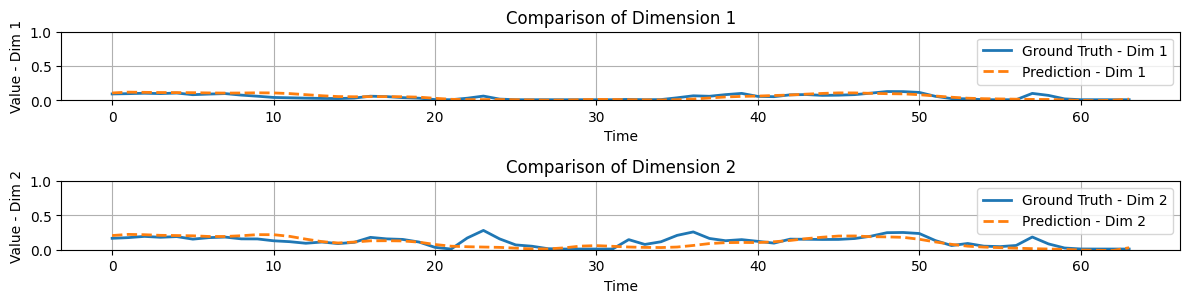

In [ ]:
import matplotlib.pyplot as plt

# Plotting each dimension pair
T, D = gt[0].shape
plt.figure(figsize=(12, 600))

for i in range(0, 2):
    plt.subplot(D, 1, i + 1)
    plt.plot(gt[0][:, i], label=f"Ground Truth - Dim {i+1}", linewidth=2)
    plt.plot(pred[0][:, i], label=f"Prediction - Dim {i+1}", linestyle="--", linewidth=2)
    plt.title(f"Comparison of Dimension {i+1}")
    plt.xlabel("Time")
    plt.ylabel(f"Value - Dim {i+1}")
    plt.ylim((0, 1))
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def load_muscle_activations_meta(
    csv_path,
):
    all_segments = pd.read_csv(csv_path)

    all_segments = all_segments.astype(str)  # Change all other columns to str
    all_segments[["height_cm", "weight_kg", "babel_sid"]] = all_segments[
        ["height_cm", "weight_kg", "babel_sid"]
    ].astype(float)
    all_segments["babel_sid"] = all_segments["babel_sid"].fillna(-1)
    all_segments[["babel_sid"]] = all_segments[["babel_sid"]].astype(int)

    return all_segments


# Load Muscle Activation Data
muscle_activations = load_muscle_activations_meta(
    csv_path=os.path.expandvars("$LSDF/data/activity/MuscleSim/MusclesInTime.csv")
)

muscle_activations.iloc[0]["data_path"]


# TODO: muscle df are dataframes which can be loaded from the data_path column file path. These dataframes contain the muscle activations over time. Muscle names are columns, rows are timesteps
# Load each sample and display a graph with the 8 selected mucsles over time.

# muscle_df = muscle_df[
#     [
#         "LU_soleus_r",
#         "LU_vaslat_r",
#         "LU_gaslat_r",
#         "LU_gasmed_r",
#         "LU_tibant_r",
#         "LU_recfem_r",
#         "LU_bflh_r",
#         "LU_bfsh_r",
#     ]
# ]

In [ ]:
def find_strings(data):
    strings = []

    def recurse(item):
        if isinstance(item, (list, tuple)):
            for sub_item in item:
                recurse(sub_item)
        elif isinstance(item, str):
            strings.append(item)

    recurse(data)
    return strings

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

muscle_act_root = "output/musint_402_exp_6/VQVAE/reps/VQVAE"

metadata_df = pd.read_csv("output/exp2_copy/VQVAE/muscle_acts3/metadata.csv")
# exclude all rows where subject does not begin with Subject
# metadata_df = metadata_df[metadata_df["name"].str.startswith("Subject")]

channel_annotations = [
    "LU_soleus_r",
    "LU_vaslat_r",
    "LU_gaslat_r",
    "LU_gasmed_r",
    "LU_tibant_r",
    "LU_recfem_r",
    "LU_bflh_r",
    "LU_bfsh_r",
]

with open(
    os.path.expandvars(
        "$LSDF/data/activity/MuscleSim/" + metadata_df.iloc[0]["name"] + "_poses/muscle_activations.pkl"
    ),
    "rb",
) as f:
    muscle_df: pd.DataFrame = pickle.load(f)

muscle_df = muscle_df[channel_annotations]
muscle_df

,LU_soleus_r,LU_vaslat_r,LU_gaslat_r,LU_gasmed_r,LU_tibant_r,LU_recfem_r,LU_bflh_r,LU_bfsh_r
0.12,0.154,0.010,0.193,0.120,0.094,0.272,0.01,0.035
0.14,0.155,0.010,0.195,0.120,0.096,0.275,0.01,0.036
0.16,0.157,0.010,0.199,0.118,0.104,0.275,0.01,0.036
0.18,0.157,0.010,0.201,0.118,0.110,0.278,0.01,0.036
0.20,0.152,0.010,0.201,0.125,0.110,0.284,0.01,0.037
...,...,...,...,...,...,...,...,...
20.94,0.216,0.019,0.082,0.036,0.088,0.300,0.01,0.011
20.96,0.218,0.021,0.077,0.040,0.072,0.291,0.01,0.011
20.98,0.220,0.021,0.075,0.045,0.063,0.330,0.01,0.011
21.00,0.222,0.018,0.079,0.045,0.068,0.377,0.01,0.011


In [ ]:
for index, row in metadata_df.iterrows():


    time_start = row['time_start']
    time_end = time_start + 64/20


    gt_file = row["name"].replace("/", "__I__") + "_gt.npy"
    pred_file = row["name"].replace("/", "__I__") + "_pred.npy"

    bdat = None

    subject = row["name"].split("/")[0]
    sequence = row["name"].split("/")[1] + "_poses"

    try:
        bdat = babel_datasets["val"].by_feat_p(get_feat_p(subject, sequence))
    except KeyError:
        continue


    if bdat is None:
        continue

    all_acts = list(set(find_strings(bdat.clip_actions_in_range(time_start, time_end))))

    print(gt_file)
    print(f"From {time_start} to {time_end}")
    print(all_acts)

    # Construct the corresponding pred file name
    pred_file = gt_file.replace("_gt.npy", "_pred.npy")

    # Load the ground truth and prediction data
    gt_path = os.path.join(muscle_act_root, gt_file)
    pred_path = os.path.join(muscle_act_root, pred_file)
    gt = np.load(gt_path)
    pred = np.load(pred_path)

    # Plotting each dimension pair
    T, D = gt[0].shape
    plt.figure(figsize=(12, D * 2))

    for i in range(380, 401):
        muscle = channel_annotations[i]
        plt.subplot(D, 1, i + 1)
        plt.plot(gt[0][:, i], label=f"Ground Truth - {muscle}", linewidth=2)
        plt.plot(pred[0][:, i], label=f"Prediction - {muscle}", linestyle="--", linewidth=2)
        plt.title(f"Comparison of {muscle}")
        plt.xlabel("Time")
        plt.ylabel(f"Value - Dim {i+1}")
        plt.ylim((0, 1))
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    bdat = None

kaiwa__I__gesture_etc-09-scratch-kaiwa_gt.npy
From 15.8 to 19.0
['transition', 'touching body part', 'scratch']


IndexError: list index out of range

<Figure size 1200x80400 with 0 Axes>

In [ ]:


for index, row in metadata_df.iterrows():

    pred_file = row["name"].replace("/", "__I__") + "_pred.npy"
    pred_path = os.path.join(muscle_act_root, pred_file)
    pred = np.load(pred_path)[0]
    print(pred.shape)


    # get the data_path for specific subject and sequence
    subject = row["name"].split("/")[0]
    sequence = row["name"].split("/")[1] + "_poses"

    segment = all_segments[
            (all_segments['subject'] == subject) & (all_segments['sequence'] == sequence)
        ]['data_path'].values[0]

    # Load the data
    musclesim_dataset = "/lsdf/data/activity/MuscleSim/musclesim_dataset"
    segment = osp.join(musclesim_dataset, segment, "muscle_activations.pkl")
    muscle_activations = pd.read_pickle(segment)

    muscle_activations1 = trim_mint_dataframe(muscle_activations["LU_tibant_r"], (row['time_start'], row['time_start'] + 64/20), rolling_average=True)

    plt.figure(figsize=(5, 3))
    plt.plot(muscle_activations1, label="Ground Truth1")
    plt.plot(pred[:, 4], label="Prediction")

    # set ylim
    plt.ylim([0,1])

    plt.legend()


    plt.show()
    plt.close('all')